In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numbers
from tabulate import tabulate
from io import StringIO

In [7]:
df_peliculas = pd.read_csv('DATA_LIMPIO.csv')

def print_tabulate(df_peliculas: pd.DataFrame):
    print(tabulate(df_peliculas, headers=df_peliculas.columns, tablefmt="orgtbl"))

In [8]:
#Funcion para transformar una variable  categorica en una serie numerica
def transform_variable(df_peliculas: pd.DataFrame, x: str) -> pd.Series:
    if isinstance(df_peliculas[x][0], numbers.Number):
        return df_peliculas[x]
    else:
        return pd.Series([i for i in range(0, len(df_peliculas[x]))])

In [9]:
#Funcion para la regresion lineal
def linear_regression(df_peliculas: pd.DataFrame, x: str, y: str) -> None:
    fixed_x = transform_variable(df_peliculas, x)
    model = sm.OLS(df_peliculas[y], sm.add_constant(fixed_x)).fit()
    print(model.summary())

    coef = pd.read_html(StringIO(model.summary().tables[1].as_html()), header=0, index_col=0)[0]['coef']

    #Media de las ventas
    mean_sales = df_peliculas[y].mean()
    
    #Se grafican los datos, la media de las ventas y la regresion lineal
    plt.scatter(fixed_x, df_peliculas[y], label='Datos reales')
    plt.axhline(mean_sales, color='green', label='Media de Ventas')
    plt.plot(fixed_x, coef.values[1] * fixed_x + coef.values[0], color='red', label='Regresión lineal')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.797
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.180
Time:                        19:11:51   Log-Likelihood:                -23945.
No. Observations:                2551   AIC:                         4.789e+04
Df Residuals:                    2549   BIC:                         4.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5202.6802    186.381     27.914      0.0

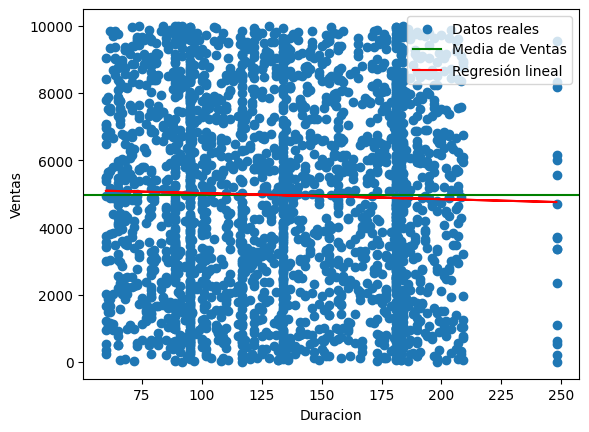

In [10]:
linear_regression(df_peliculas, "Duracion", "Ventas")